In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/gdrive/My Drive/Dataset/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/gdrive/My Drive/Dataset/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_raja_helena : 100
Jumlah kupu_pantat_merah : 100
Jumlah kupu_jojo : 100
Jumlah kupu_batik_cap : 100
Jumlah kupu_jarak : 100
Jumlah kupu_hijau_biru : 100
Jumlah kupu_harimau_kuning_hijau : 100
Jumlah kupu_raja_limau : 100


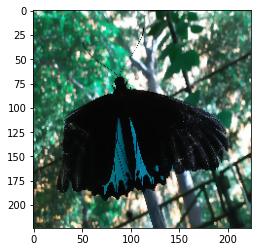

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 560 trained image filenames belonging 8 class
Found 80 validated image filenames belonging 8 class
Found 160 tested image filenames belonging 8 class


In [5]:
len(y_test)

160

In [6]:
print(lb_arr)

['kupu_raja_helena', 'kupu_pantat_merah', 'kupu_jojo', 'kupu_batik_cap', 'kupu_jarak', 'kupu_hijau_biru', 'kupu_harimau_kuning_hijau', 'kupu_raja_limau']


In [7]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
 base_model= tf.keras.applications.InceptionV3(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

87924736/87910968 [==============================] - 0s 0us/step


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [10]:
x = base_model.output
x= GlobalAveragePooling2D()(x)
prediction = Dense(8, activation='softmax')(x)
model = Model(inputs = base_model.input,outputs=prediction)

In [11]:
import tensorflow.keras as keras

In [12]:
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
epochs = 10
adam=Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
# https://linuxtut.com/en/4bc6d6174bb3e8461c6d/
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
import torch
import torchvision

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=8)
#                     , callbacks=[checkpoint])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
70/70 [==============================] - 27s 107ms/step - loss: 0.4862 - accuracy: 0.8571 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 2/10
70/70 [==============================] - 6s 89ms/step - loss: 0.0586 - accuracy: 0.9893 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 3/10
70/70 [==============================] - 6s 90ms/step - loss: 0.0480 - accuracy: 0.9911 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 6s 90ms/step - loss: 0.0503 - accuracy: 0.9875 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 5/10
70/70 [==============================] - 6s 91ms/step - loss: 0.0444 - accuracy: 0.9875 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 6s 90ms/step - loss: 0.0165 - accuracy: 0.9982 - val_loss: 0.0134 - val_accuracy: 0.9937
Epoch 7/10
70/70 [==============================] - 6s 89ms/step - loss: 0.0162 - accuracy: 0.9964 - val_loss: 0.0207 - val_accuracy: 0.9937
Epoch 8/10


In [14]:
# model_json=model.to_json()
# with open("/content/gdrive/MyDrive/Dataset CNN/Testingmodel.json","w") as file:
#     file.write(model_json)
# model.save_weights("/content/gdrive/MyDrive/Dataset CNN/Testingmy_model.h5")
# print("Model berhasil disimpan !! ")

In [15]:
# from tensorflow.keras.models import model_from_json
# json_file = open('/content/gdrive/MyDrive/Dataset CNN/Testingmodel.json','r')
# loaded_model_json = json_file.read()
# json_file.close()
# 
# load_model = model_from_json(loaded_model_json)
# load_model.load_weights("/content/gdrive/MyDrive/Dataset CNN/Testingmy_model.h5")
# 
# print("Loadded!")

In [16]:
# from keras.models import load_model

In [17]:
# https://medium.com/analytics-vidhya/building-a-convolutional-neural-network-based-on-the-alexnet-architecture-89f8e70c8de4
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

5/5 [==============================] - 0s 74ms/step - loss: 1.3949e-04 - accuracy: 1.0000

Test accuracy: 1.0


In [18]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

18/18 [==============================] - 4s 126ms/step - loss: 1.9779e-04 - accuracy: 1.0000

Train accuracy: 1.0


In [19]:
#Graph drawing
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

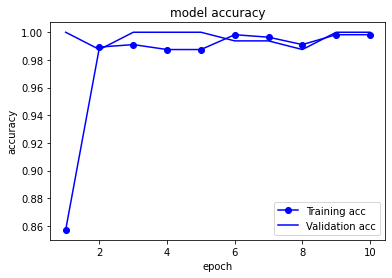

In [20]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

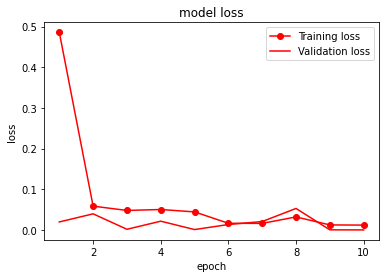

In [22]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=lb_arr))

                           precision    recall  f1-score   support

         kupu_raja_helena       1.00      1.00      1.00        23
        kupu_pantat_merah       1.00      1.00      1.00        17
                kupu_jojo       1.00      1.00      1.00        20
           kupu_batik_cap       1.00      1.00      1.00        22
               kupu_jarak       1.00      1.00      1.00        13
          kupu_hijau_biru       1.00      1.00      1.00        22
kupu_harimau_kuning_hijau       1.00      1.00      1.00        21
          kupu_raja_limau       1.00      1.00      1.00        22

                 accuracy                           1.00       160
                macro avg       1.00      1.00      1.00       160
             weighted avg       1.00      1.00      1.00       160



In [26]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([3, 3, 3, 3, 0, 1, 2, 7, 4, 2, 5, 0, 7, 3, 0, 5, 0, 3, 7, 2, 0, 5,
       2, 2, 0, 6, 0, 1, 3, 7, 7, 7, 0, 1, 6, 0, 2, 3, 5, 6, 7, 0, 1, 2,
       7, 0, 0, 7, 4, 4, 1, 5, 6, 5, 1, 4, 1, 7, 0, 7, 6, 5, 3, 7, 4, 3,
       2, 5, 7, 5, 7, 5, 5, 2, 1, 0, 6, 4, 3, 6, 7, 4, 0, 3, 4, 0, 6, 0,
       7, 1, 3, 6, 6, 1, 3, 4, 3, 2, 3, 1, 5, 5, 2, 2, 0, 1, 0, 6, 0, 4,
       4, 1, 2, 0, 3, 6, 7, 3, 5, 0, 6, 2, 7, 6, 2, 5, 6, 3, 2, 2, 6, 3,
       0, 1, 5, 6, 3, 6, 5, 2, 4, 6, 5, 7, 2, 5, 5, 1, 7, 7, 6, 1, 1, 7,
       2, 5, 6, 5, 3, 4])

In [27]:
y_test_class = np.argmax(y_test, axis=1)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
cm = confusion_matrix(y_test_class, y_pred)
print(cm)

1.0
[[23  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0 22]]


In [29]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

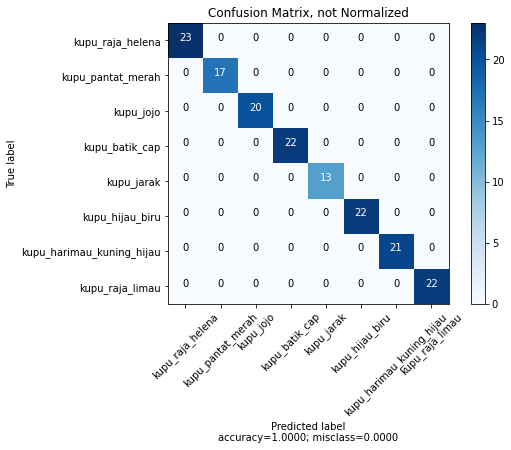

In [30]:
plot_confusion_matrix(cm, 
                      normalize=False,
                      target_names = lb_arr,
                      title="Confusion Matrix, not Normalized")